In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
train_df = pd.read_csv('/Users/fazalurrahman/Downloads/archive/fraudTrain.csv')
test_df = pd.read_csv('/Users/fazalurrahman/Downloads/archive/fraudTest.csv')

In [4]:
train_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [5]:
train_df.shape
test_df.shape

(555719, 23)

In [6]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [7]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
train_df['gender'].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

In [9]:
train_df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [10]:
train_df['trans_hour'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.hour
train_df['trans_day'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.day
train_df['trans_month'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.month
train_df['trans_year'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.year

In [11]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_hour', 'trans_day',
       'trans_month', 'trans_year'],
      dtype='object')

In [12]:
train_df.groupby('is_fraud')['trans_hour'].mean()

is_fraud
0    12.797679
1    14.037836
Name: trans_hour, dtype: float64

<Axes: xlabel='gender'>

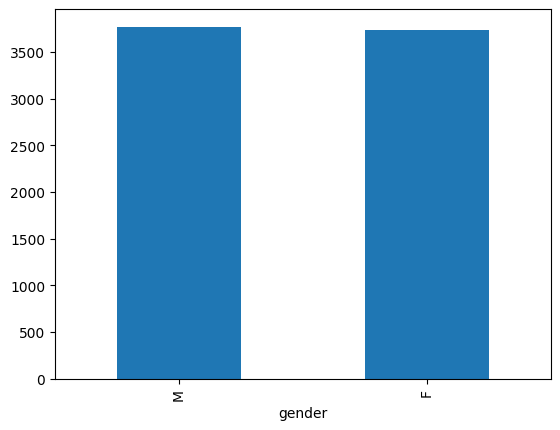

In [13]:
train_df[train_df['is_fraud']==1]['gender'].value_counts().plot(kind = 'bar')

In [14]:
train_df = train_df.drop(['Unnamed: 0','trans_date_trans_time'], axis =1)

In [15]:
train_df[train_df['is_fraud'] == 1]['cc_num'].value_counts()

cc_num
4593569795412          19
3520550088202337       19
4260128500325          18
4400011257587661852    16
3518669219150142       16
                       ..
4503101193493052864     2
4089096483689733451     2
6011109736646996        2
4809701904914           2
4005676619255478        2
Name: count, Length: 762, dtype: int64

In [16]:
train_df = train_df.drop('merchant', axis =1)

In [17]:
train_df['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [18]:
train_df = train_df.drop(['first','last','street'], axis =1)

In [19]:
train_df['city'].value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: count, Length: 894, dtype: int64

In [20]:
train_df = train_df.drop('city', axis =1)

In [21]:
train_df['state'].value_counts()

state
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: count, dtype: int64

In [22]:
train_df['zip'].value_counts()

zip
73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
         ... 
46510       7
16041       7
38915       7
10018       7
23523       7
Name: count, Length: 970, dtype: int64

In [23]:
train_df = train_df.drop('zip',axis =1)

In [24]:
train_df.groupby('is_fraud')['city_pop'].mean()

is_fraud
0    88775.228137
1    97276.763256
Name: city_pop, dtype: float64

In [25]:
train_df[train_df['is_fraud']==1]['job'].value_counts()

job
Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Statistician                             3
Health physicist                         3
Chartered loss adjuster                  3
English as a second language teacher     2
Contractor                               2
Name: count, Length: 443, dtype: int64

In [26]:
train_df = train_df.drop('job', axis =1)

In [27]:
train_df['trans_num'].value_counts()

trans_num
0b242abb623afc578575680df30655b9    1
c85864e7e7cf0be6d1b8597977b8afea    1
1a8a2a05638a5503cc6bb8d5735efcc1    1
4556eaf1f7def06eb500325cde4d054e    1
5e915d9f88bd09cee9655a470d9bc0bd    1
                                   ..
2d1aa5b21a993788ac19b697598ca44c    1
b50dd4b47d1ad877874661afba6eb7f6    1
5ce4e974bf15b7d9f133c6eedb81ceb1    1
64d601ddeaf4eba8b191bd1859998209    1
8f7c8e4ab7f25875d753b422917c98c9    1
Name: count, Length: 1296675, dtype: int64

In [28]:
train_df = train_df.drop('trans_num', axis =1)

In [29]:
train_df['birth_year'] = pd.to_datetime(train_df['dob']).dt.year

In [30]:
train_df['age'] = train_df['birth_year'] - train_df['trans_year']

In [31]:
train_df['age'] = -train_df['age']

In [32]:
train_df = train_df.drop('dob', axis =1)

In [33]:
train_df.select_dtypes(include = ['object'])

,category,gender,state
0,misc_net,F,NC
1,grocery_pos,F,WA
2,entertainment,M,ID
3,gas_transport,M,MT
4,misc_pos,M,VA
...,...,...,...
1296670,entertainment,M,UT
1296671,food_dining,M,MD
1296672,food_dining,M,NM
1296673,food_dining,M,SD


In [34]:
from sklearn.utils import resample

In [35]:
df_majority = train_df[train_df['is_fraud']==0]
df_minority = train_df[train_df['is_fraud']==1] 

df_majority.shape,df_minority.shape

((1289169, 18), (7506, 18))

In [36]:
1289169-7506

1281663

In [37]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples= 1281663, random_state=42)  
df_minority_upsampled.shape

total_upsampled = pd.concat([df_minority_upsampled, df_majority])
total_upsampled.shape

(2570832, 18)

In [38]:
total_upsampled.select_dtypes(include = ['object'])

,category,gender,state
1261427,shopping_net,M,WY
88685,grocery_pos,M,IL
950365,grocery_pos,F,OH
927484,gas_transport,M,TX
921796,misc_pos,F,PA
...,...,...,...
1296670,entertainment,M,UT
1296671,food_dining,M,MD
1296672,food_dining,M,NM
1296673,food_dining,M,SD


In [39]:
train_df_dum = pd.get_dummies(total_upsampled, columns = ['category', 'state'], drop_first = False)

In [40]:
train_df['gender'] = train_df['gender'].replace({'M':1, 'F':0})

/var/folders/4f/82k7qwwn6wlchd05q2dnkvbh0000gn/T/ipykernel_25920/163720864.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['gender'] = train_df['gender'].replace({'M':1, 'F':0})


In [41]:
train_df_dummy = pd.get_dummies(train_df, columns = ['category', 'state'], drop_first = False)

In [42]:
train_df_dum['is_fraud'].value_counts()
train_df_dum['gender'] = train_df_dum['gender'].replace({'M':1, 'F':0})

/var/folders/4f/82k7qwwn6wlchd05q2dnkvbh0000gn/T/ipykernel_25920/1637161053.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df_dum['gender'] = train_df_dum['gender'].replace({'M':1, 'F':0})


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [44]:
X = train_df_dum.drop('is_fraud', axis =1).values
y = train_df_dum['is_fraud'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [45]:
y_train.shape

(2056665,)

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

In [48]:
!pip install xgboost

In [49]:
from xgboost import XGBClassifier
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=scale_pos_weight,  
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  
)

In [50]:
print(f'Training...')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred) *100

print(f'Accuracy of classifier = {accuracy}')

confusion = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion)

Training...


/Users/fazalurrahman/miniforge3/envs/tf_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [19:23:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of classifier = 98.84006558180513
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    258208
           1       0.99      0.99      0.99    255959

    accuracy                           0.99    514167
   macro avg       0.99      0.99      0.99    514167
weighted avg       0.99      0.99      0.99    514167

[[254807   3401]
 [  2563 253396]]


In [51]:
import shap

/Users/fazalurrahman/miniforge3/envs/tf_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [52]:
columns = train_df_dum.drop('is_fraud', axis =1).columns


In [53]:
X_test_df = pd.DataFrame(X_test, columns = columns )
X_test_df = pd.DataFrame(X_train,columns = columns )

In [61]:
explainer = shap.TreeExplainer(model, X_train_df)

In [55]:
X_train_df = pd.DataFrame(X_train, columns = columns)
X_test_df = pd.DataFrame(X_test, columns = columns)

In [108]:
shap_values = explainer(X_test_scaled)

100%|===================| 513700/514167 [16:56<00:00]        

In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in X_test_df.select_dtypes(include=['object']).columns:
    X_test_df[column] = label_encoder.fit_transform(X_test_df[column])
    X_train_df[column] = label_encoder.fit_transform(X_train_df[column])

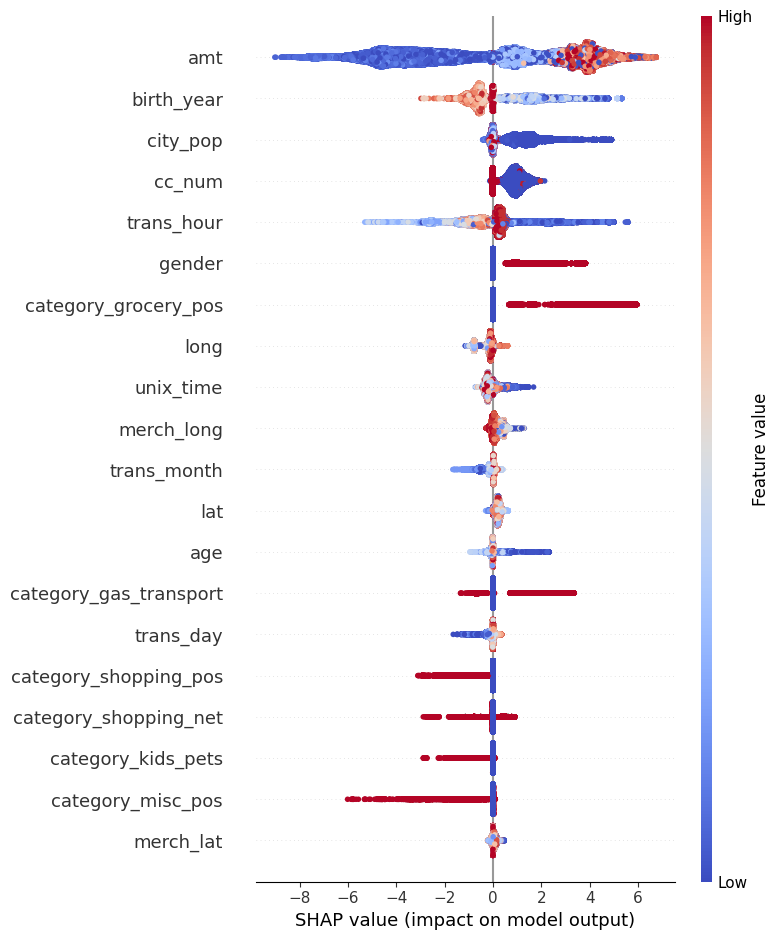

In [109]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test_df.columns,cmap="coolwarm", plot_type="dot")


In [114]:
shap_values_class_1 = shap_values[1]
shap_values_class_0 = shap_values[0]

In [122]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0:1,:],X_train_df.iloc[0:1,:], plot_cmap="DrDb")